In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [13]:
#intial_dataset = pd.read_csv("train.csv")

In [14]:
#dataset = pd.read_csv("train.csv")

In [15]:
#dataset = intial_dataset.sample(frac = 0.1,random_state=0)

In [16]:
#dataset.to_csv("dataset_sampled.csv")

In [113]:
dataset = pd.read_csv("dataset_sampled.csv")
test_dataset = pd.read_csv("test_revised.csv")

### Analysis of dataset

In [36]:
dataset.shape

(1113547, 20)

In [312]:
test_dataset.shape

(64000, 16)

In [13]:
dataset.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06
mean,5.571050e+06,1.529188e+00,1.657283e+00,3.029327e+00,-7.305962e+01,4.024766e+01,1.043692e+00,-7.313092e+01,4.028782e+01,1.349625e+00,1.333468e+01,3.405538e-01,4.972738e-01,1.835671e+00,3.377642e-01,2.996659e-01,1.664871e+01
std,3.214538e+06,4.991475e-01,1.302624e+00,3.816946e+00,8.169789e+00,4.500594e+00,5.862743e-01,7.849238e+00,4.323112e+00,4.947822e-01,1.394672e+01,4.530082e-01,3.966875e-02,2.716106e+00,1.741324e+00,1.350077e-02,1.622029e+01
min,2.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,-1.161129e+02,0.000000e+00,1.000000e+00,-1.151684e+02,0.000000e+00,1.000000e+00,-2.300000e+02,-4.500000e+00,-5.000000e-01,-7.920000e+00,-1.050000e+01,-3.000000e-01,-2.413000e+02
25%,2.791410e+06,1.000000e+00,1.000000e+00,1.000000e+00,-7.399177e+01,4.073658e+01,1.000000e+00,-7.399123e+01,4.073494e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.800000e+00
50%,5.573538e+06,2.000000e+00,1.000000e+00,1.710000e+00,-7.398134e+01,4.075361e+01,1.000000e+00,-7.397936e+01,4.075410e+01,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.350000e+00,0.000000e+00,3.000000e-01,1.230000e+01
75%,8.353019e+06,2.000000e+00,2.000000e+00,3.220000e+00,-7.396619e+01,4.076831e+01,1.000000e+00,-7.396199e+01,4.076954e+01,2.000000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.450000e+00,0.000000e+00,3.000000e-01,1.836000e+01
max,1.113545e+07,2.000000e+00,9.000000e+00,5.055000e+02,0.000000e+00,6.409648e+01,9.900000e+01,1.062469e+02,4.623993e+01,4.000000e+00,8.452000e+03,5.500000e+00,1.000000e+00,8.548500e+02,5.800000e+02,9.400000e-01,8.452800e+03


In [114]:
test_dataset.describe()

,ID,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,tolls_amount,improvement_surcharge
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,32000.500000,1.532219,1.683312,5.814134,-73.961224,40.744212,1.406250,-73.975563,40.746595,1.339938,1.720729,0.299986
std,18475.352951,0.498965,1.315349,7.143087,0.060814,0.038182,0.913769,0.084022,0.047569,0.494794,4.142556,0.002054
min,1.000000,1.000000,0.000000,0.010000,-74.822891,40.316776,1.000000,-74.816330,40.217930,1.000000,0.000000,0.000000
25%,16000.750000,1.000000,1.000000,1.190000,-73.991379,40.731735,1.000000,-73.993767,40.725551,1.000000,0.000000,0.300000
50%,32000.500000,2.000000,1.000000,2.230000,-73.980621,40.751961,1.000000,-73.980354,40.751427,1.000000,0.000000,0.300000
75%,48000.250000,2.000000,2.000000,7.700000,-73.962318,40.766659,1.000000,-73.960648,40.768589,2.000000,0.000000,0.300000
max,64000.000000,2.000000,9.000000,84.600000,-73.188499,41.422253,5.000000,-72.711067,41.435841,4.000000,95.540000,0.300000


In [273]:
dataset.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,510205,2,2016-06-02 00:34:25,2016-06-02 00:54:42,1,6.10,-73.994568,40.725990,1,N,-73.960747,40.799648,1,20.0,0.5,0.5,1.00,0.0,0.3,22.30
1,2638457,1,2016-06-11 13:48:02,2016-06-11 13:53:24,1,1.00,-73.990570,40.771523,1,N,-73.995148,40.759354,1,6.0,0.0,0.5,1.70,0.0,0.3,8.50
2,7396380,1,2016-06-22 16:48:49,2016-06-22 16:55:02,1,0.70,-73.985054,40.768436,1,N,-73.983154,40.760925,1,6.0,1.0,0.5,1.95,0.0,0.3,9.75
3,4521493,2,2016-06-12 21:14:19,2016-06-12 21:20:48,1,1.05,-73.985710,40.750546,1,N,-73.978607,40.753746,2,6.5,0.5,0.5,0.00,0.0,0.3,7.80
4,7461453,2,2016-06-22 19:56:50,2016-06-22 19:57:45,1,0.37,-73.963051,40.766579,1,N,-73.959557,40.771191,1,3.0,1.0,0.5,1.20,0.0,0.3,6.00


In [14]:
dataset.tail()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
11130,4657460,1,2016-06-13 10:11:14,2016-06-13 10:27:42,1,1.40,-73.990150,40.757046,1,N,-74.004547,40.741978,2,11.0,0.0,0.5,0.00,0.0,0.3,11.80
11131,9441176,1,2016-06-28 06:48:39,2016-06-28 07:05:09,1,5.60,-74.008736,40.704525,1,N,-73.993027,40.753227,1,19.0,0.0,0.5,3.95,0.0,0.3,23.75
11132,6303569,2,2016-06-17 18:07:39,2016-06-17 18:30:21,1,3.47,-73.988815,40.736740,1,N,-73.951897,40.766586,1,16.5,1.0,0.5,3.66,0.0,0.3,21.96
11133,1063510,2,2016-06-03 11:53:20,2016-06-03 12:01:44,1,0.98,-73.962852,40.758400,1,N,-73.953659,40.770840,1,7.0,0.0,0.5,1.56,0.0,0.3,9.36
11134,3806545,1,2016-06-08 15:52:24,2016-06-08 16:24:32,2,1.90,-73.978882,40.785210,1,N,-73.976448,40.765652,1,19.0,0.0,0.5,3.95,0.0,0.3,23.75


### VendorID

A code indicating the TPEP provider that provided the record.
1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.

In [5]:
dataset["VendorID"].value_counts()

2    117913
1    104796
Name: VendorID, dtype: int64

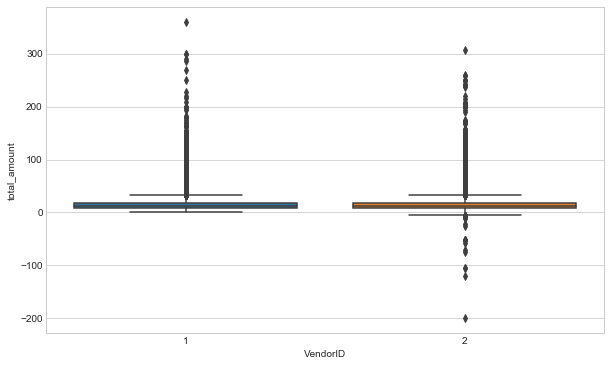

In [6]:
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="VendorID", y="total_amount", data=dataset)

### Passenger Count(Feature)

The number of passengers in the vehicle.
This is a driver-entered value.

In [7]:
dataset["passenger_count"].value_counts()

1    158259
2     32071
5     11410
3      9263
6      7202
4      4498
0         4
8         1
7         1
Name: passenger_count, dtype: int64

In [10]:
dataset["passenger_count"].mean()

1.6565159292639384

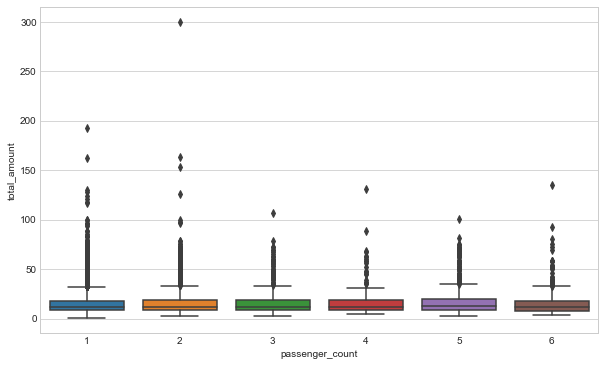

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="passenger_count", y="total_amount", data=dataset)

### store_and_fwd_flag

This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.

Y= store and forward trip

N= not a store and forward trip

In [11]:
dataset["store_and_fwd_flag"].value_counts()

N    553457
Y      3317
Name: store_and_fwd_flag, dtype: int64

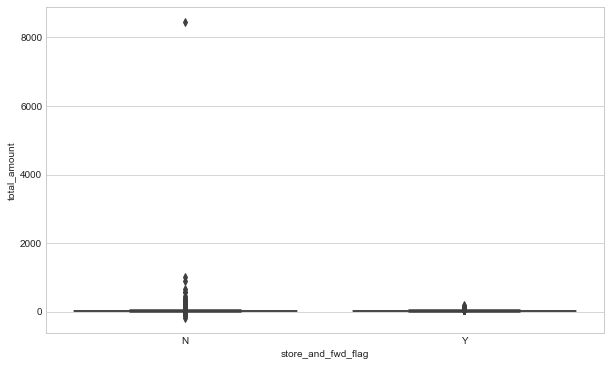

In [12]:
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="store_and_fwd_flag", y="total_amount", data=dataset)

In [ ]:
dataset.where(dataset["store_and_fwd_flag"]=="N").mean().loc["total_amount"]
#dataset.where(dataset["store_and_fwd_flag"]==0).mean().loc["total_amount"]

In [52]:
dataset.where(dataset["store_and_fwd_flag"]=="Y").mean().loc["total_amount"]

22.456562499999986

### Trip Distance(Feature)

The elapsed trip distance in miles reported by the taximeter

In [8]:
dataset["trip_distance"].mean()

3.032327656268944

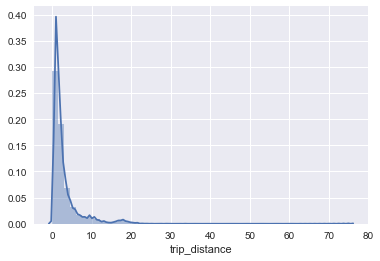

In [39]:
sns.set(color_codes=True)
sns.distplot(dataset["trip_distance"])

In [ ]:
#dataset.hist(column="trip_distance",bins=12)

In [46]:
custom_bucket_array = [-0.0754, 9.425,18.85, 28.275, 37.7, 47.125,56.55, 65.975,75.4]
#dataset["trip_distance"] = pd.cut(dataset["trip_distance"], 8)
dataset["trip_distance"] = pd.DataFrame(pd.cut(dataset["trip_distance"], bins = 8,labels = [0,1,2,3,4,5,6,7]))
dataset["trip_distance"].unique()

array([0, 1, 2, 3, 7], dtype=int64)

In [48]:
dataset["trip_distance"].value_counts()

0    10368
1      661
2      102
3        3
7        1
Name: trip_distance, dtype: int64

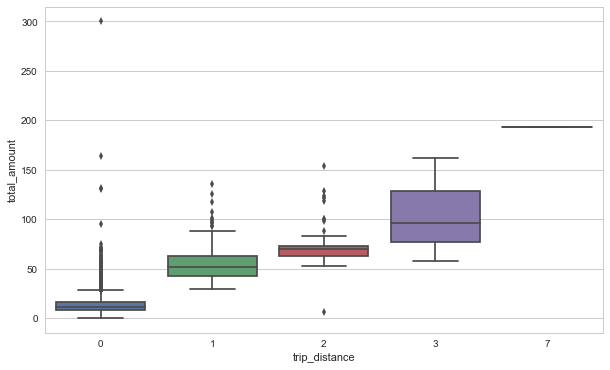

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="trip_distance", y="total_amount", data=dataset)

### RatecodeID

The final rate code in effect at the end of the trip.
1. Standard rate
2. JFK
3. Newark
4. Nassau or Westchester
5. Negotiated fare
6. Group ride

In [50]:
dataset["RatecodeID"].value_counts()

1    10819
2      262
5       31
3       16
4        7
Name: RatecodeID, dtype: int64

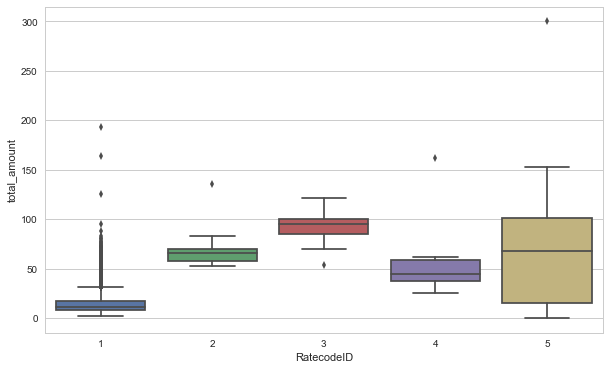

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="RatecodeID", y="total_amount", data=dataset)

### Payment Type

A numeric code signifying how the passenger paid for the trip.
1. Credit card
2. Cash
3. No charge
4. Dispute
5. Unknown
6. Voided trip

In [51]:
dataset["payment_type"].value_counts()

1    7374
2    3696
3      47
4      18
Name: payment_type, dtype: int64

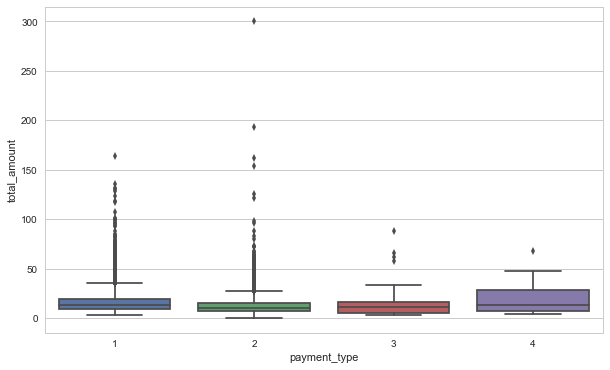

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="payment_type", y="total_amount", data=dataset)

### Fare amount 

The time-and-distance fare calculated by the meter.

In [54]:
dataset["fare_amount"].describe()

count    11135.000000
mean        13.351907
std         11.521606
min          0.000000
25%          6.500000
50%         10.000000
75%         15.000000
max        300.000000
Name: fare_amount, dtype: float64

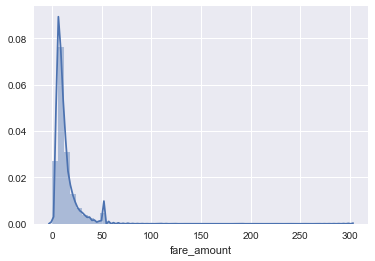

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
sns.distplot(dataset["fare_amount"])

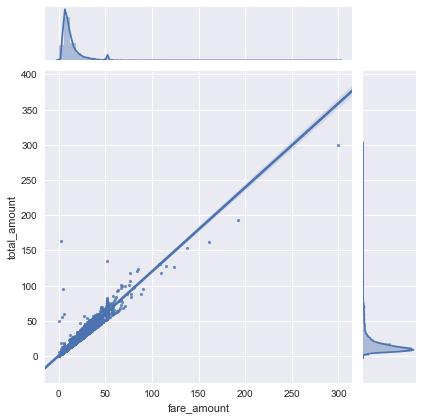

In [56]:
gridA = sns.JointGrid(x="fare_amount", y="total_amount", data=dataset, size=6)
#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

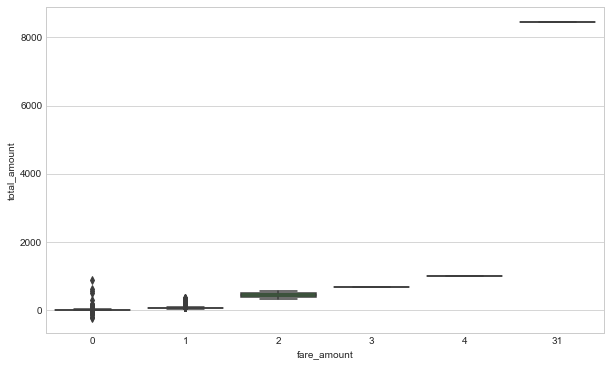

In [10]:
dataset["fare_amount"] = pd.DataFrame(pd.cut(dataset["fare_amount"], bins = 32,labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]))
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="fare_amount", y="total_amount",data = dataset)

### Extra

Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.

In [18]:
dataset["extra"].describe()

count    11135.000000
mean         0.344993
std          0.460537
min          0.000000
25%          0.000000
50%          0.000000
75%          0.500000
max          4.500000
Name: extra, dtype: float64

In [21]:
dataset["extra"].value_counts()

0.0    5584
0.5    3769
1.0    1732
4.5      50
Name: extra, dtype: int64

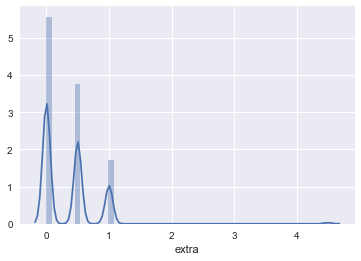

In [19]:
sns.set(color_codes=True)
sns.distplot(dataset["extra"])

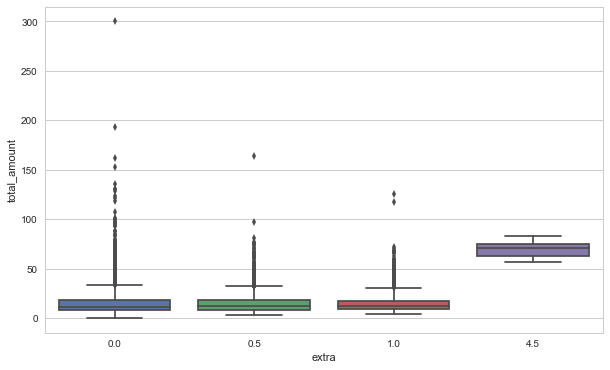

In [22]:
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="extra", y="total_amount", data=dataset)

### mta_tax

$0.50 MTA tax that is automatically triggered based on the metered rate in use.

In [11]:
dataset["mta_tax"].value_counts()

 0.50    1107956
 0.00       5100
-0.50        485
 0.25          5
 1.00          1
Name: mta_tax, dtype: int64

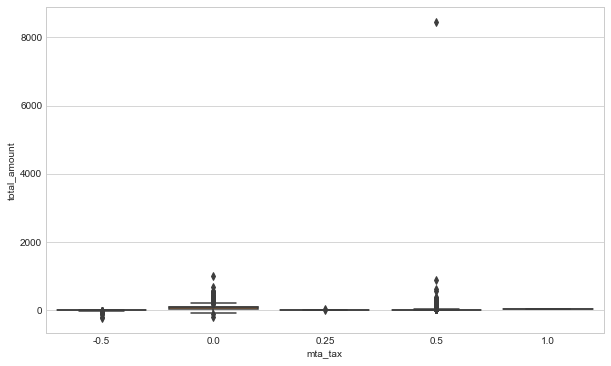

In [12]:
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="mta_tax", y="total_amount", data=dataset)

### tip_amount

Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.

In [28]:
dataset["tip_amount"].describe()

count    11135.000000
mean         1.876583
std          3.080116
min          0.000000
25%          0.000000
50%          1.350000
75%          2.460000
max        160.000000
Name: tip_amount, dtype: float64

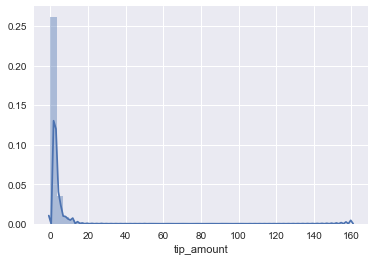

In [29]:
sns.set(color_codes=True)
sns.distplot(dataset["tip_amount"])

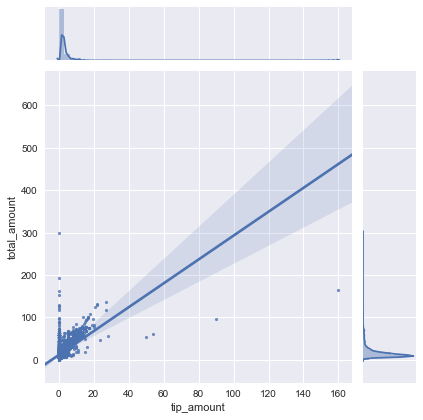

In [30]:
gridA = sns.JointGrid(x="tip_amount", y="total_amount", data=dataset, size=6)
#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

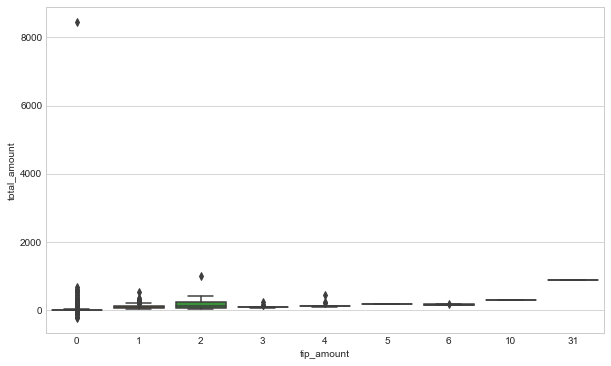

In [13]:
dataset["tip_amount"] = pd.DataFrame(pd.cut(dataset["tip_amount"], bins = 16,labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]))
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="tip_amount", y="total_amount",data = dataset)

### tolls_amount

Total amount of all tolls paid in trip.

In [32]:
dataset["tolls_amount"].describe()

count    11135.000000
mean         0.341379
std          1.595157
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         55.540000
Name: tolls_amount, dtype: float64

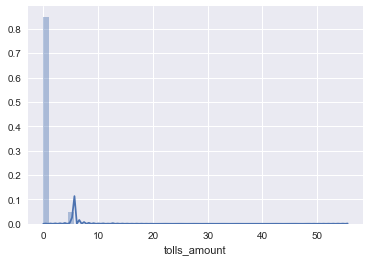

In [33]:
sns.set(color_codes=True)
sns.distplot(dataset["tolls_amount"])

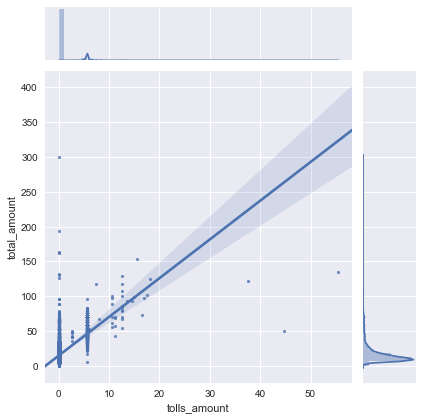

In [35]:
gridA = sns.JointGrid(x="tolls_amount", y="total_amount", data=dataset, size=6)
#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

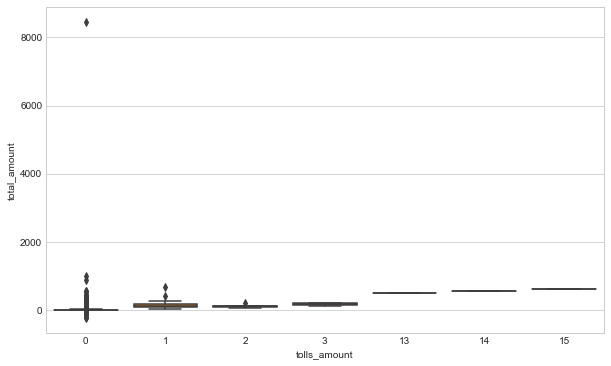

In [14]:
dataset["tolls_amount"] = pd.DataFrame(pd.cut(dataset["tolls_amount"], bins = 8,labels = [0,1,2,3,4,5,6,7]))
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="tolls_amount", y="total_amount",data = dataset)

### improvement_surcharge

$0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.

In [37]:
dataset["improvement_surcharge"].describe()

count    11135.000000
mean         0.299946
std          0.004020
min          0.000000
25%          0.300000
50%          0.300000
75%          0.300000
max          0.300000
Name: improvement_surcharge, dtype: float64

In [3]:
dataset["improvement_surcharge"].value_counts()

 0.30    1112808
-0.30        505
 0.00        232
 0.26          1
 0.94          1
Name: improvement_surcharge, dtype: int64

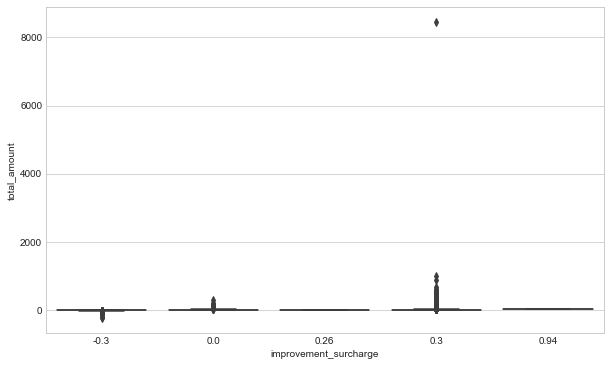

In [4]:
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="improvement_surcharge", y="total_amount", data=dataset)

### Latiture and Longitude

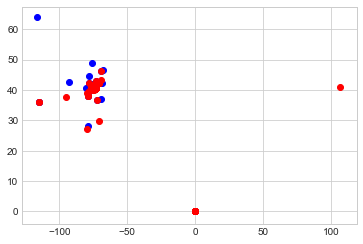

In [15]:
import matplotlib.pyplot as plt
plt.scatter(dataset["pickup_longitude"],dataset["pickup_latitude"],c = "blue")
plt.scatter(dataset["dropoff_longitude"],dataset["dropoff_latitude"],c = "red")

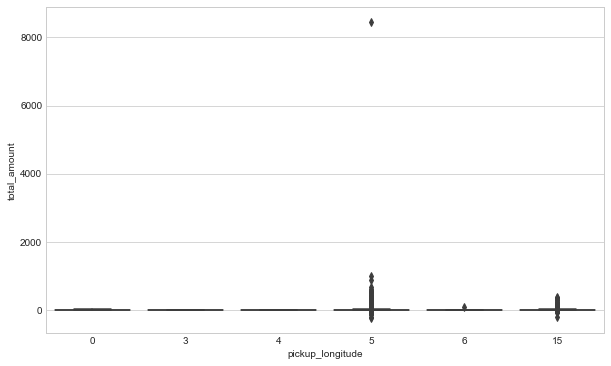

In [3]:
dataset["pickup_longitude"] = pd.DataFrame(pd.cut(dataset["pickup_longitude"], bins = 16,labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]))
import seaborn as sns
import matplotlib.pyplot as palt
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="pickup_longitude", y="total_amount",data = dataset)

## Correlation

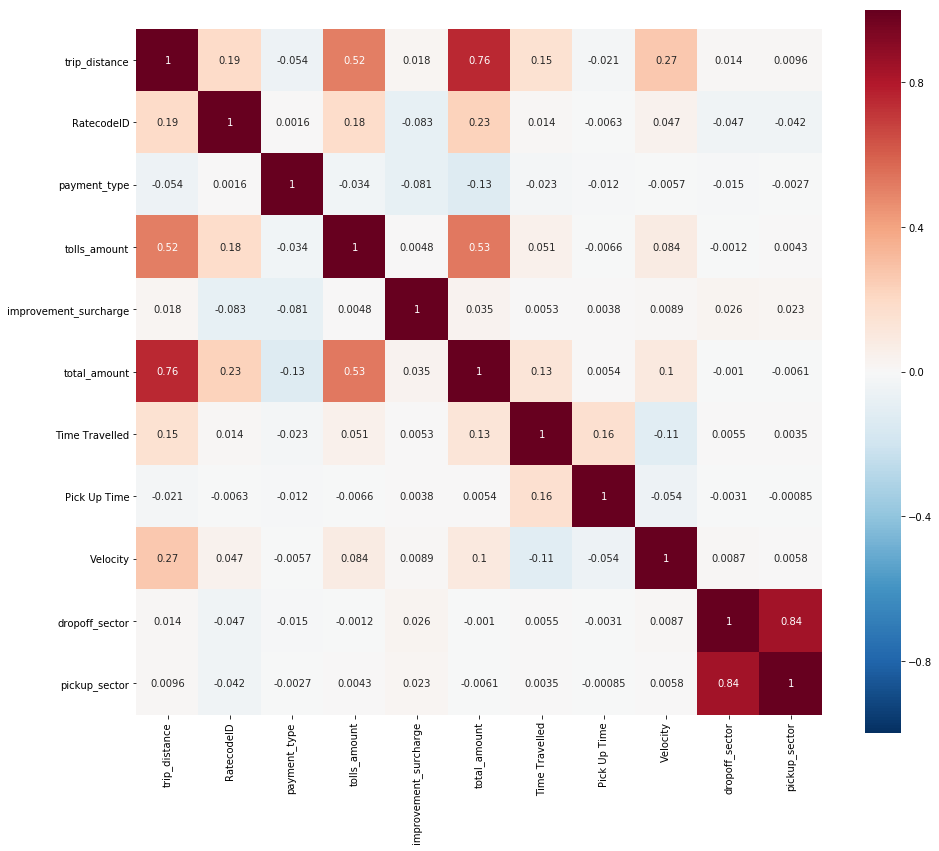

In [459]:
#Correlation of features
corr_features = dataset
#corr_features = corr_features.drop("pickup_latitude",axis = 1)
#corr_features = corr_features.drop("pickup_longitude",axis = 1)
#corr_features = corr_features.drop("dropoff_latitude",axis = 1)
#corr_features = corr_features.drop("dropoff_longitude",axis = 1)
cmat = corr_features.corr()
f, ax = plt.subplots(figsize=(14,12))
sns.heatmap(cmat,square=True,annot=True,linewidths=0, vmin=-1,cmap="RdBu_r")
f.tight_layout()
#plt.savefig("corr.png")
plt.show()

## Feature Engineering

### Time travelled - Pickup and Dropoff time(Minutes)

In [6]:
dataset["tpep_pickup_datetime"] = pd.to_datetime(dataset.tpep_pickup_datetime)
dataset["tpep_dropoff_datetime"] = pd.to_datetime(dataset.tpep_dropoff_datetime)
test_dataset["tpep_pickup_datetime"] = pd.to_datetime(test_dataset.tpep_pickup_datetime)
test_dataset["tpep_dropoff_datetime"] = pd.to_datetime(test_dataset.tpep_dropoff_datetime)

In [7]:
#dataset["Travelling Time"] = (dataset.tpep_dropoff_datetime - dataset.tpep_pickup_datetime)
delta_hours = dataset["tpep_dropoff_datetime"].dt.hour - dataset["tpep_pickup_datetime"].dt.hour
delta_minutes = dataset["tpep_dropoff_datetime"].dt.minute - dataset["tpep_pickup_datetime"].dt.minute

delta_hours_test = test_dataset["tpep_dropoff_datetime"].dt.hour - test_dataset["tpep_pickup_datetime"].dt.hour
delta_minutes_test = test_dataset["tpep_dropoff_datetime"].dt.minute - test_dataset["tpep_pickup_datetime"].dt.minute

In [8]:
delta_minutes = delta_minutes.abs()
delta_minutes_test = delta_minutes_test.abs()

In [9]:
delta_hours = delta_hours.abs()
delta_hours_test = delta_hours_test.abs()

In [14]:
time_travelled = delta_hours*60 + delta_minutes
test_time_travelled = delta_hours_test*60 + delta_minutes_test

In [15]:
dataset["Time Travelled"] =  time_travelled.abs()
test_dataset["Time Travelled"] =  test_time_travelled.abs()

In [ ]:
sns.distplot(delta_hours)

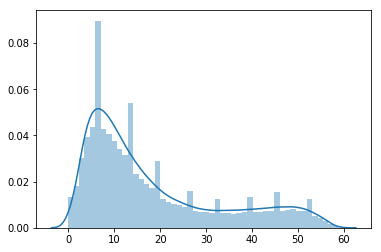

In [161]:
sns.distplot(delta_minutes)

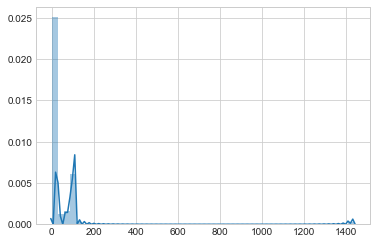

In [11]:
sns.distplot(time_travelled)

In [ ]:
gridA = sns.JointGrid(x="Time Travelled", y="total_amount", data=dataset, size=6)
#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

In [ ]:
dataset["Time Travelled"] = pd.DataFrame(pd.cut(dataset["Time Travelled"], bins = 8,labels = [0,1,2,3,4,5,6,7]))
import seaborn as sns
import matplotlib.pyplot as palt
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="Time Travelled", y="total_amount",data = dataset)

### PickUp time Feature

In [28]:
#dataset["Travelling Time"] = (dataset.tpep_dropoff_datetime - dataset.tpep_pickup_datetime)
hours = dataset["tpep_pickup_datetime"].dt.hour
minutes = dataset["tpep_pickup_datetime"].dt.minute
hours_test = test_dataset["tpep_pickup_datetime"].dt.hour
minutes_test = test_dataset["tpep_pickup_datetime"].dt.minute

AttributeError: Can only use .dt accessor with datetimelike values

In [29]:
minutes = minutes.abs()
hours = hours.abs()
minutes_test = minutes_test.abs()
hours_test = hours_test.abs()

NameError: name 'minutes' is not defined

In [411]:
pickUpTime = hours + minutes/60
pickUpTime.describe()

count    1.113547e+06
mean     1.403356e+01
std      6.481227e+00
min      0.000000e+00
25%      9.416667e+00
50%      1.461667e+01
75%      1.953333e+01
max      2.398333e+01
Name: tpep_pickup_datetime, dtype: float64

In [412]:
pickUpTime_test = hours_test + minutes_test/60
pickUpTime_test.describe()

count    64000.000000
mean        13.902751
std          6.339230
min          0.000000
25%          9.350000
50%         14.500000
75%         19.200000
max         23.983333
Name: tpep_pickup_datetime, dtype: float64

In [413]:
dataset["Pick Up Time"] =  pickUpTime.abs()
test_dataset["Pick Up Time"] =  pickUpTime_test.abs()

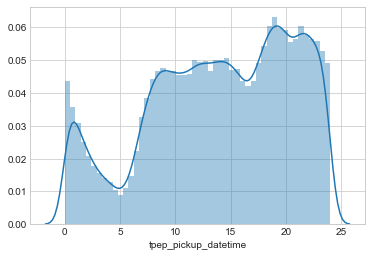

In [22]:
sns.distplot(pickUpTime)

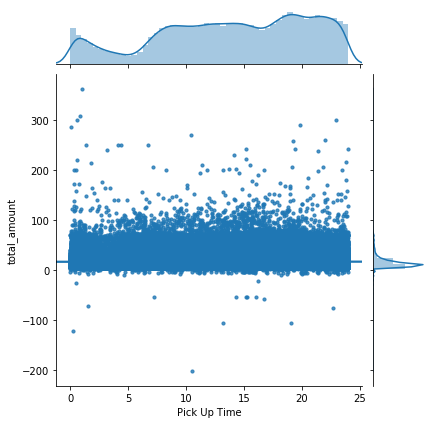

In [110]:
gridA = sns.JointGrid(x="Pick Up Time", y="total_amount", data=dataset, size=6)
#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

In [ ]:
dataset["Pick Up Time"] = pd.DataFrame(pd.cut(dataset["Pick Up Time"], bins = 8,labels = [0,1,2,3,4,5,6,7]))
import seaborn as sns
import matplotlib.pyplot as palt
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="Pick Up Time", y="total_amount",data = dataset)

### Velocity Feature

In [414]:
dataset[(dataset["tpep_pickup_datetime"]==dataset["tpep_dropoff_datetime"])==True].head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Time Travelled,Pick Up Time
945,7989825,1,2016-06-24 05:29:56,2016-06-24 05:29:56,1,0.0,-73.965874,40.758621,1,N,...,2,4.5,0.5,0.5,0.0,0.0,0.3,5.8,0,5.483333
3380,4202560,1,2016-06-09 14:22:50,2016-06-09 14:22:50,2,0.0,-73.984673,40.779682,1,N,...,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3,0,14.366667
5102,5277374,1,2016-06-15 00:35:50,2016-06-15 00:35:50,2,0.0,-73.968567,40.764858,5,N,...,2,300.0,0.0,0.0,0.0,0.0,0.0,300.0,0,0.583333
5584,2506992,1,2016-06-11 04:07:28,2016-06-11 04:07:28,2,0.0,-73.997200,40.762718,1,N,...,2,17.0,0.5,0.5,0.0,0.0,0.3,18.3,0,4.116667
5994,4716784,1,2016-06-13 14:10:24,2016-06-13 14:10:24,1,0.0,-73.969887,40.757042,1,N,...,2,3.0,0.0,0.5,0.0,0.0,0.3,3.8,0,14.166667


In [415]:
dataset["Velocity"] = dataset["trip_distance"]/(dataset["Time Travelled"]/60)
test_dataset["Velocity"] = test_dataset["trip_distance"]/test_dataset["Time Travelled"] 

In [416]:
dataset = dataset.replace([np.inf, -np.inf], np.nan)
test_dataset = test_dataset.replace([np.inf, -np.inf], np.nan)
dataset = dataset.replace(np.nan,0)
test_dataset = test_dataset.replace(np.nan,0)

In [ ]:
#dataset["Velocity"] = dataset["Velocity"].loc[dataset["Velocity"].abs() > dataset["Velocity"].max(), 'Velocity' ] = dataset["Velocity"].max()
dataset[dataset["Velocity"] > 100] = 100
test_dataset[test_dataset["Velocity"] > 100] = 100

C:\Users\makkh\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\makkh\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


ValueError: cannot convert float NaN to integer

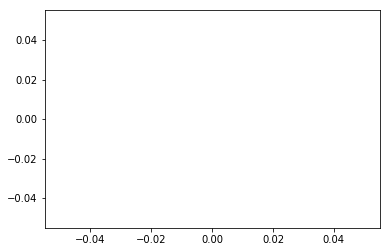

In [47]:
sns.distplot(dataset["Velocity"])

In [ ]:
dataset["Velocity"] = pd.DataFrame(pd.cut(dataset["Velocity"], bins = 8,labels = [0,1,2,3,4,5,6,7]))
import seaborn as sns
import matplotlib.pyplot as palt
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="Velocity", y="total_amount",data = dataset)

## Pickup and DropOff location

In [63]:
custom_bucket_array  = [-116.229,-101.599,-87.085,-72.571,-58.056,-43.542,-29.028,-14.514,0]
#dataset["pickup_longitude"] = pd.cut(dataset["pickup_longitude"], 8)
#dataset["pickup_longitude"] = pd.DataFrame(pd.cut(dataset["pickup_longitude"], bins = custom_bucket_array,labels = [0,1,2,3,4,5,6,7]))
dataset["pickup_longitude"] = pd.DataFrame(pd.cut(dataset["pickup_longitude"], bins = 8,labels = [0,1,2,3,4,5,6,7]))
dataset["pickup_longitude"].unique()

array([2, 7, 3, 0, 1], dtype=int64)

In [64]:
#pd.cut(dataset["pickup_latitude"], 8).head()
custom_bucket_array = [-0.0641, 8.012,16.024,24.036,32.048, 40.06,48.072, 56.084,64.096]
dataset["pickup_latitude"] = pd.DataFrame(pd.cut(dataset["pickup_latitude"], bins = 8,labels = [0,1,2,3,4,5,6,7]))
dataset["pickup_latitude"].unique()

array([5, 0, 4, 7, 6, 3], dtype=int64)

In [65]:
#pd.cut(dataset["dropoff_longitude"],8).head()
custom_bucket_array = [-115.39, -87.491,-59.815, -32.138,-4.461, 23.216,50.893, 78.57,106.247]
dataset["dropoff_longitude"] = pd.DataFrame(pd.cut(dataset["dropoff_longitude"], bins = 8,labels = [0,1,2,3,4,5,6,7]))
dataset["dropoff_longitude"].unique()

array([1, 4, 7, 0], dtype=int64)

In [66]:
#pd.cut(dataset["dropoff_longitude"],8).head()
custom_bucket_array = [-0.007, 0.875, 1.75, 2.625, 3.5, 4.375, 5.25, 6.125, 7.0 ]
dataset["dropoff_latitude"] = pd.DataFrame(pd.cut(dataset["dropoff_latitude"], bins = 8,labels = [0,1,2,3,4,5,6,7]))
dataset["dropoff_latitude"].unique()

array([7, 0, 6, 5, 4], dtype=int64)

In [67]:
features = ["dropoff_latitude","dropoff_longitude"]
from sklearn.preprocessing import  OneHotEncoder
onehotencoder = OneHotEncoder()
onehotencoder.fit(dataset[features])  
newFeatures = onehotencoder.transform(dataset[features]).toarray()

In [77]:
features = ["pickup_latitude","pickup_longitude"]
from sklearn.preprocessing import  OneHotEncoder
onehotencoder = OneHotEncoder()
onehotencoder.fit(dataset[features])  
newFeatures2 = onehotencoder.transform(dataset[features]).toarray()

In [74]:
dataset = pd.concat([dataset, pd.DataFrame(newFeatures)], axis=1)

In [78]:
dataset = pd.concat([dataset, pd.DataFrame(newFeatures2)], axis=1)

In [79]:
dataset.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,1,2,3,4,5,6,7,8,9,10
0,510205,2,2016-06-02 00:34:25,2016-06-02 00:54:42,1,6.10,2,5,1,N,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2638457,1,2016-06-11 13:48:02,2016-06-11 13:53:24,1,1.00,2,5,1,N,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7396380,1,2016-06-22 16:48:49,2016-06-22 16:55:02,1,0.70,2,5,1,N,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4521493,2,2016-06-12 21:14:19,2016-06-12 21:20:48,1,1.05,2,5,1,N,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7461453,2,2016-06-22 19:56:50,2016-06-22 19:57:45,1,0.37,2,5,1,N,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Sector Feature 

In [114]:
dataset["dropoff_sector"] = (dataset["dropoff_latitude"]*dataset["dropoff_longitude"])

In [115]:
dataset["pickup_sector"] = (dataset["pickup_latitude"]*dataset["pickup_longitude"])

## store_and_fwd_flag feature

In [116]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
dataset["store_and_fwd_flag"] = encoder.fit_transform(dataset["store_and_fwd_flag"])
test_dataset["store_and_fwd_flag"] = encoder.fit_transform(test_dataset["store_and_fwd_flag"])

In [117]:
dataset.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,dropoff_sector,pickup_sector
count,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06
mean,5.571050e+06,1.529188e+00,1.657283e+00,3.029327e+00,-7.305962e+01,4.024766e+01,1.043692e+00,6.014115e-03,-7.313092e+01,4.028782e+01,1.349625e+00,1.333468e+01,3.405538e-01,4.972738e-01,1.835671e+00,3.377642e-01,2.996659e-01,1.664871e+01,-2.980207e+03,-2.977245e+03
std,3.214538e+06,4.991475e-01,1.302624e+00,3.816946e+00,8.169789e+00,4.500594e+00,5.862743e-01,7.731721e-02,7.849238e+00,4.323112e+00,4.947822e-01,1.394672e+01,4.530082e-01,3.966875e-02,2.716106e+00,1.741324e+00,1.350077e-02,1.622029e+01,3.198751e+02,3.329550e+02
min,2.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,-1.161129e+02,0.000000e+00,1.000000e+00,0.000000e+00,-1.151684e+02,0.000000e+00,1.000000e+00,-2.300000e+02,-4.500000e+00,-5.000000e-01,-7.920000e+00,-1.050000e+01,-3.000000e-01,-2.413000e+02,-4.157798e+03,-7.442431e+03
25%,2.791410e+06,1.000000e+00,1.000000e+00,1.000000e+00,-7.399177e+01,4.073658e+01,1.000000e+00,0.000000e+00,-7.399123e+01,4.073494e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.800000e+00,-3.015738e+03,-3.015644e+03
50%,5.573538e+06,2.000000e+00,1.000000e+00,1.710000e+00,-7.398134e+01,4.075361e+01,1.000000e+00,0.000000e+00,-7.397936e+01,4.075410e+01,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.350000e+00,0.000000e+00,3.000000e-01,1.230000e+01,-3.014963e+03,-3.014943e+03
75%,8.353019e+06,2.000000e+00,2.000000e+00,3.220000e+00,-7.396619e+01,4.076831e+01,1.000000e+00,0.000000e+00,-7.396199e+01,4.076954e+01,2.000000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.450000e+00,0.000000e+00,3.000000e-01,1.836000e+01,-3.013774e+03,-3.013907e+03
max,1.113545e+07,2.000000e+00,9.000000e+00,5.055000e+02,0.000000e+00,6.409648e+01,9.900000e+01,1.000000e+00,1.062469e+02,4.623993e+01,4.000000e+00,8.452000e+03,5.500000e+00,1.000000e+00,8.548500e+02,5.800000e+02,9.400000e-01,8.452800e+03,4.356057e+03,0.000000e+00


In [445]:
dataset.head()

,Unnamed: 0,trip_distance,RatecodeID,payment_type,tolls_amount,improvement_surcharge,total_amount,Time Travelled,Pick Up Time,Velocity,dropoff_sector,pickup_sector
0,510205,6.10,1,1,0.0,0.3,22.30,20,0.566667,18.3,7,10
1,2638457,1.00,1,1,0.0,0.3,8.50,5,13.800000,12.0,7,10
2,7396380,0.70,1,1,0.0,0.3,9.75,7,16.800000,6.0,7,10
3,4521493,1.05,1,2,0.0,0.3,7.80,6,21.233333,10.5,7,10
4,7461453,0.37,1,1,0.0,0.3,6.00,1,19.933333,22.2,7,10


### Delete Features

#### Match features of test dataset

In [118]:
dataset = dataset.drop("fare_amount",axis=1)
dataset = dataset.drop("extra",axis=1)
dataset = dataset.drop("mta_tax",axis=1)
dataset = dataset.drop("tip_amount",axis=1)

In [119]:
dataset = dataset.drop("tpep_pickup_datetime",axis=1)
dataset = dataset.drop("tpep_dropoff_datetime",axis=1)
test_dataset = test_dataset.drop("tpep_pickup_datetime",axis=1)
test_dataset = test_dataset.drop("tpep_dropoff_datetime",axis=1)

In [120]:
dataset = dataset.drop("Unnamed: 0",axis=1)
test_dataset = test_dataset.drop("ID",axis=1)

#### Delete Other useless features

In [121]:
dataset = dataset.drop("VendorID",axis=1)
test_dataset = test_dataset.drop("VendorID",axis=1)

In [122]:
dataset = dataset.drop("passenger_count",axis=1)
test_dataset = test_dataset.drop("passenger_count",axis=1)

In [123]:
dataset = dataset.drop("store_and_fwd_flag",axis=1)
test_dataset = test_dataset.drop("store_and_fwd_flag",axis=1)

In [124]:
dataset = dataset.drop("dropoff_longitude",axis=1)
test_dataset = test_dataset.drop("dropoff_longitude",axis=1)

In [125]:
dataset = dataset.drop("dropoff_latitude",axis=1)
test_dataset = test_dataset.drop("dropoff_latitude",axis=1)

In [126]:
dataset = dataset.drop("pickup_longitude",axis=1)
test_dataset = test_dataset.drop("pickup_longitude",axis=1)

In [127]:
dataset = dataset.drop("pickup_latitude",axis=1)
test_dataset = test_dataset.drop("pickup_latitude",axis=1)

In [128]:
dataset.shape

(1113547, 8)

In [283]:
test_dataset.shape

(64000, 13)

### Split into features and labels

In [129]:
features = dataset.drop("total_amount",axis = 1)
labels = dataset["total_amount"]

### Normalize

In [107]:
from sklearn import preprocessing
import pandas as pd
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(features)
features = pd.DataFrame(x_scaled)
features.columns = list( dataset.drop("total_amount",axis = 1).columns.values)
features.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,tolls_amount,improvement_surcharge,dropoff_sector,pickup_sector
count,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06,1.113547e+06
mean,5.291883e-01,1.841425e-01,5.992735e-03,3.707883e-01,6.279231e-01,4.458359e-04,6.014115e-03,1.898580e-01,8.712778e-01,1.165417e-01,1.835354e-02,4.836016e-01,1.383146e-01,5.999634e-01
std,4.991475e-01,1.447360e-01,7.550833e-03,7.036071e-02,7.021593e-02,5.982390e-03,7.731721e-02,3.545030e-02,9.349306e-02,1.649274e-01,2.948897e-03,1.088772e-02,3.757112e-02,4.473740e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.111111e-01,1.978239e-03,3.627604e-01,6.355510e-01,0.000000e+00,0.000000e+00,1.859726e-01,8.809472e-01,0.000000e+00,1.778154e-02,4.838710e-01,1.341414e-01,5.948039e-01
50%,1.000000e+00,1.111111e-01,3.382789e-03,3.628502e-01,6.358166e-01,0.000000e+00,0.000000e+00,1.860261e-01,8.813617e-01,0.000000e+00,1.778154e-02,4.838710e-01,1.342324e-01,5.948981e-01
75%,1.000000e+00,2.222222e-01,6.369931e-03,3.629806e-01,6.360459e-01,0.000000e+00,0.000000e+00,1.861046e-01,8.816955e-01,3.333333e-01,1.778154e-02,4.838710e-01,1.343720e-01,5.950374e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [108]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(test_dataset)
test_dataset = pd.DataFrame(x_scaled)
test_dataset.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,0.532219,0.187035,0.068615,0.527210,0.386653,0.101562,0.006719,0.399365,0.434075,0.113312,0.018011,0.999953
std,0.498965,0.146150,0.084444,0.037209,0.034539,0.228442,0.081693,0.039911,0.039058,0.164931,0.043359,0.006846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.111111,0.013950,0.508760,0.375367,0.000000,0.000000,0.390718,0.416796,0.000000,0.000000,1.000000
50%,1.000000,0.111111,0.026244,0.515341,0.393662,0.000000,0.000000,0.397089,0.438043,0.000000,0.000000,1.000000
75%,1.000000,0.222222,0.090909,0.526540,0.406958,0.000000,0.000000,0.406449,0.452134,0.333333,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Training and Testing

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.25, random_state=0)

In [131]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [132]:
from sklearn.metrics import mean_absolute_error
y_pred = linearRegression.predict(X_test)
print("MAE:",mean_absolute_error(y_pred,y_test))

MAE: 2.803719224294728


In [101]:
pd.DataFrame(y_pred).describe()

,0
count,278387.000000
mean,16.641278
std,21.239503
min,-200.824937
25%,8.796006
50%,12.302814
75%,18.366205
max,8453.632134


In [220]:
pd.DataFrame(y_test).describe()

,total_amount
count,55678.000000
mean,16.725821
std,14.238415
min,-105.800000
25%,8.800000
50%,12.300000
75%,18.360000
max,360.350000


In [221]:
pd.DataFrame(y_test).head()

,total_amount
116191,15.30
87604,20.16
12915,20.30
146437,7.80
63784,9.36


In [222]:
pd.DataFrame(y_pred).head()

,0
0,5.348236
1,21.494998
2,12.855161
3,7.950307
4,11.405666


### Predicting on test dataset

In [333]:
y_pred_test = linearRegression.predict(test_dataset)

In [334]:
arange = np.arange(1,y_pred_test.size+1)
df = pd.DataFrame({"ID" : arange, "total_amount" : y_pred_test})
df.to_csv("result1.csv", index=False)

In [61]:
pd.DataFrame(y_pred_test).describe()

,0
count,64000.000000
mean,30.165834
std,27.795878
min,3.017439
25%,12.705863
50%,16.206929
75%,36.743036
max,280.542595


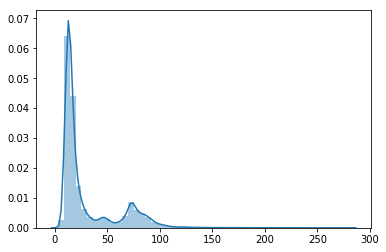

In [62]:
sns.distplot(y_pred_test)

In [65]:
pd.DataFrame(y_pred_test).describe()

,0
count,64000.000000
mean,30.165834
std,27.795878
min,3.017439
25%,12.705863
50%,16.206929
75%,36.743036
max,280.542595
